   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 3177.0078 - mae: 49.8054 - val_loss: 3393.0054 - val_mae: 53.2458
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 3073.1011 - mae: 47.9285 - val_loss: 3368.1956 - val_mae: 53.0109
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 3244.1575 - mae: 49.9070 - val_loss: 3341.3052 - val_mae: 52.7577
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3183.4805 - mae: 49.1864 - val_loss: 3310.7380 - val_mae: 52.4640
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3144.3835 - mae: 49.2483 - val_loss: 3274.4934 - val_mae: 52.1130
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3143.3948 - mae: 49.8462 - val_loss: 3230.5981 - val_mae: 51.6837
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 3029.1414 - mae: 48.1601 - val_loss: 3177.0474 - val_mae: 51.1579
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3211.4302 - mae: 49.8507 - val_loss: 3111.0542 - val_mae: 50.5026
Epoch 9/

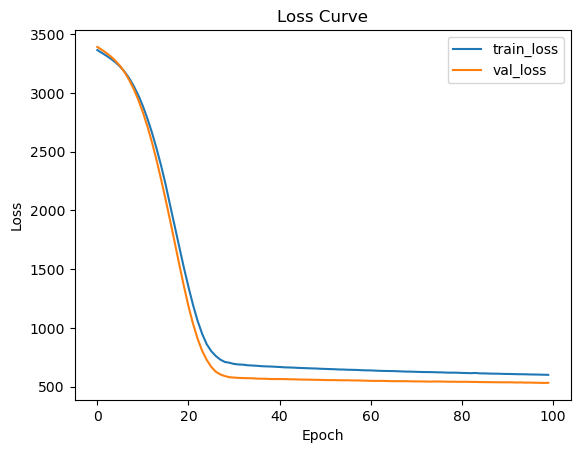

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 447.5200 - mae: 17.3284 
Test Loss: {loss}
Test MAE: {mae}
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
실제 점수: [52 79  4  1 11]
예측 점수: [53.96402  66.967514 36.895508 48.310486 42.385647]


In [5]:
# 1. 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 2. 데이터 불러오기
df = pd.read_csv('Mall_Customers.csv')

# 3. 데이터 확인
print(df.head())

# 4. 필요 없는 열 제거 (예: CustomerID)
df = df.drop(columns=['CustomerID'])

# 5. 범주형 데이터(성별) 숫자로 변환
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# 6. X (입력 데이터), y (예측할 데이터) 나누기
X = df.drop(columns=['Spending Score (1-100)'])   # 특징들
y = df['Spending Score (1-100)']                   # 타겟(점수)

# 7. 데이터 분할 (학습용 80%, 테스트용 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8. 스케일링 (정규화)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 9. 딥러닝 모델 만들기
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # 출력층 (회귀이므로 activation 없음)

# 10. 모델 컴파일
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 11. 모델 학습
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2)

# 12. 학습 과정 시각화
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# 13. 테스트셋 평가
loss, mae = model.evaluate(X_test, y_test)
print("Test Loss: {loss}")
print("Test MAE: {mae}")

# 14. 예측 예시
y_pred = model.predict(X_test)
print("실제 점수:", y_test.values[:5])
print("예측 점수:", y_pred[:5].flatten())